<a href="https://colab.research.google.com/github/Mini-project4ppl/Mini_Project/blob/master/Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Predicted Severity Level: Severe


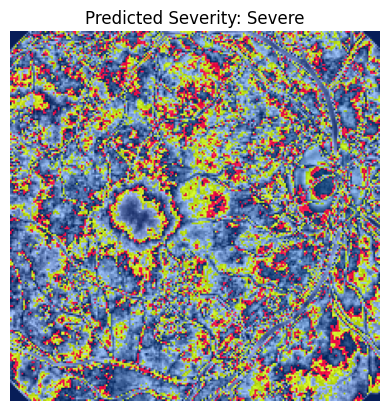

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models

# Create an instance of the DenseNet201 model
model = models.densenet201()

# Load the pretrained weights of your model
pretrained_weights = torch.load("/content/drive/MyDrive/trained_models/trained_model2.pth")

# Remove the 'module.' prefix from the state_dict keys (if present)
if list(pretrained_weights.keys())[0].startswith('module.'):
    pretrained_weights = {k[7:]: v for k, v in pretrained_weights.items()}

# Remove the last layer of the current model classifier
model.classifier = torch.nn.Identity()

# Load the pretrained weights into the model (excluding the last layer)
model.load_state_dict(pretrained_weights, strict=False)

# Add a new classifier layer with the correct number of output classes
num_classes = 5
model.classifier = torch.nn.Linear(1920, num_classes)

# Set the model to evaluation mode
model.eval()

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Set the path to the image file
image_path = "/content/drive/MyDrive/Test_dataset/levels/3/26997_right.jpg"

# Load and preprocess the input image
input_image = Image.open(image_path).convert("RGB")
ip_img=Image.open(image_path)
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0)

# Check if a GPU is available and move the model and input to GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_batch = input_batch.to(device)

# Perform the forward pass
with torch.no_grad():
    output = model(input_batch)

# Get the predicted severity level
_, predicted_index = torch.max(output, 1)

severity_levels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
if predicted_index.item() < len(severity_levels):
    predicted_severity = severity_levels[predicted_index.item()]
else:
    predicted_severity = "Unknown"

print(f"Predicted Severity Level: {predicted_severity}")

# Show the image along with the predicted severity
import matplotlib.pyplot as plt

# Convert the input tensor back to a PIL image
input_image = transforms.functional.to_pil_image(input_tensor)

plt.imshow(input_image)
plt.title(f"Predicted Severity: {predicted_severity}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 52ms/step
Predicted Severity Level: No DR


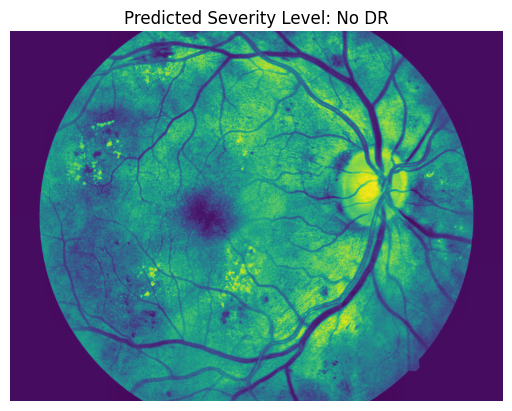

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the regression model
model_path = "/content/drive/MyDrive/trained_models/regmodel2.h5"
model = tf.keras.models.load_model(model_path)

# Preprocess the input image
input_shape = (64, 64)
input_image = Image.open("/content/drive/MyDrive/Test_dataset/levels/3/26997_right.jpg").convert("RGB")
input_image = input_image.resize(input_shape)
input_tensor = np.array(input_image) / 255.0
input_tensor = np.expand_dims(input_tensor, axis=0)

# Perform the prediction
output = model.predict(input_tensor)[0]

# Get the predicted severity level
predicted_index = np.argmax(output)

severity_levels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
if predicted_index < len(severity_levels):
    predicted_severity = severity_levels[predicted_index]
else:
    predicted_severity = "Unknown"

# Print the predicted severity level
print(f"Predicted Severity Level: {predicted_severity}")

# Display the input image
import matplotlib.pyplot as plt

image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Predicted Severity Level: {predicted_severity}")
plt.axis('off')
plt.show()

In [ ]:
#Densenet accuracy
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models

# Set the path to the folder containing test images
test_data_dir = '/content/drive/MyDrive/Test_dataset/levels'

# Define the transformations applied to the input images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test dataset
test_dataset = ImageFolder(test_data_dir, transform=transform)

# Create the DataLoader for the test data
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained DenseNet model
dn_model_path = '/content/drive/MyDrive/trained_models/trained_model2.pth'
dn_model = models.densenet201(pretrained=True)
dn_model.classifier = nn.Linear(dn_model.classifier.in_features, len(test_dataset.classes))
dn_model.load_state_dict(torch.load(dn_model_path), strict=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dn_model.to(device)
dn_model.eval()

# Evaluation function
def evaluate_model(model, dataloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the DenseNet model on the test dataset
dn_model_accuracy = evaluate_model(dn_model, test_dataloader)

# Print the accuracy
print(f"Accuracy for DenseNet Model: {dn_model_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy for DenseNet Model: 57.14%


In [ ]:
#Regression Accuracy
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models

# Set the path to the folder containing test images
test_data_dir = '/content/drive/MyDrive/Test_dataset/levels'

# Define the transformations applied to the input images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test dataset
test_dataset = ImageFolder(test_data_dir, transform=transform)

# Create the DataLoader for the test data
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained regression model
reg_model_path = '/content/drive/MyDrive/trained_models/regmodel2.pth'
reg_model = models.densenet201(pretrained=False)
reg_model.classifier = nn.Linear(reg_model.classifier.in_features, len(test_dataset.classes))
reg_model.load_state_dict(torch.load(reg_model_path), strict=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
reg_model.to(device)
reg_model.eval()

# Evaluation function
def evaluate_model(model, dataloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the regression model on the test dataset
reg_model_accuracy = evaluate_model(reg_model, test_dataloader)

# Print the accuracy
print(f"Accuracy for Regression Model: {reg_model_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Accuracy for Regression Model: 19.84%


1/1 [==============================] - 0s 57ms/step
Classification Model - Predicted Severity Level: Severe
Regression Model - Predicted Severity Level: Proliferative DR


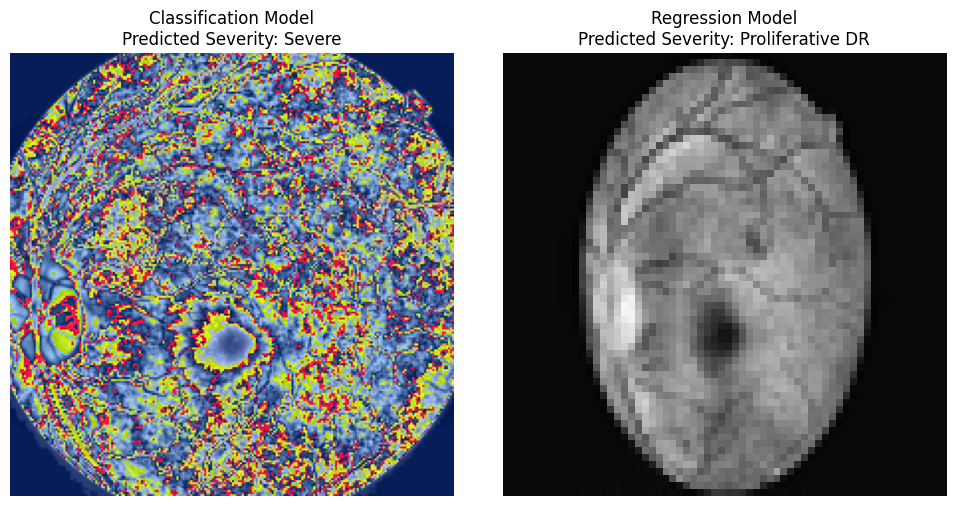

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the regression model
reg_model_path = "/content/drive/MyDrive/trained_models/regmodel2.h5"
reg_model = tf.keras.models.load_model(reg_model_path)

# Load the classification model
class_model = models.densenet201()
class_model_weights = torch.load("/content/drive/MyDrive/trained_models/trained_model2.pth")
if list(class_model_weights.keys())[0].startswith('module.'):
    class_model_weights = {k[7:]: v for k, v in class_model_weights.items()}
class_model.classifier = torch.nn.Identity()
class_model.load_state_dict(class_model_weights, strict=False)
num_classes = 5
class_model.classifier = torch.nn.Linear(1920, num_classes)
class_model.eval()

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image_path = "/content/drive/MyDrive/Test_dataset/levels/3/15795_left.jpg"
input_image = Image.open(input_image_path).convert("RGB")
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0)

# Perform the forward pass for the classification model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_model = class_model.to(device)
input_batch = input_batch.to(device)
with torch.no_grad():
    output_class = class_model(input_batch)
_, predicted_index_class = torch.max(output_class, 1)
severity_levels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
if predicted_index_class.item() < len(severity_levels):
    predicted_severity_class = severity_levels[predicted_index_class.item()]
else:
    predicted_severity_class = "Unknown"

# Preprocess the input image for the regression model
input_shape = (64, 64)
input_image_reg = Image.open(input_image_path).convert("RGB")
input_image_reg = input_image_reg.resize(input_shape)
input_tensor_reg = np.array(input_image_reg) / 255.0
input_tensor_reg = np.expand_dims(input_tensor_reg, axis=0)

# Perform the prediction for the regression model
output_reg = reg_model.predict(input_tensor_reg)[0]
predicted_index_reg = np.argmax(output_reg)
if predicted_index_reg < len(severity_levels):
    predicted_severity_reg = severity_levels[predicted_index_reg]
else:
    predicted_severity_reg = "Unknown"

# Print the predicted severity levels
print(f"Classification Model - Predicted Severity Level: {predicted_severity_class}")
print(f"Regression Model - Predicted Severity Level: {predicted_severity_reg}")

# Display the input image
input_image = transforms.functional.to_pil_image(input_tensor)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].set_title(f"Classification Model\nPredicted Severity: {predicted_severity_class}")
axes[0].axis('off')
axes[1].imshow(input_image_reg)
axes[1].set_title(f"Regression Model\nPredicted Severity: {predicted_severity_reg}")
axes[1].axis('off')
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 94ms/step
Classification Model - Predicted Severity Level: Severe
Regression Model - Predicted Severity Level: No DR


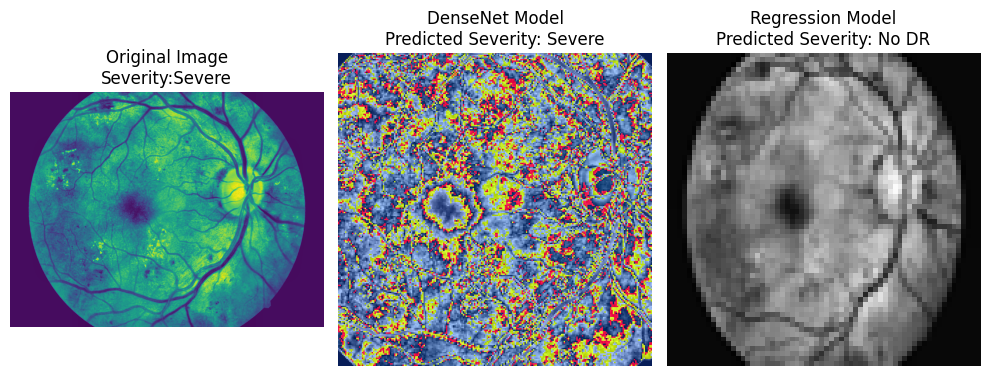

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the regression model
reg_model_path = "/content/drive/MyDrive/trained_models/regmodel2.h5"
reg_model = tf.keras.models.load_model(reg_model_path)

# Load the classification model
class_model = models.densenet201()
class_model_weights = torch.load("/content/drive/MyDrive/trained_models/trained_model2.pth")
if list(class_model_weights.keys())[0].startswith('module.'):
    class_model_weights = {k[7:]: v for k, v in class_model_weights.items()}
class_model.classifier = torch.nn.Identity()
class_model.load_state_dict(class_model_weights, strict=False)
num_classes = 5
class_model.classifier = torch.nn.Linear(1920, num_classes)
class_model.eval()

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image_path = "/content/drive/MyDrive/Test_dataset/levels/3/26997_right.jpg"
input_image = Image.open(input_image_path).convert("RGB")
ip_img=Image.open(input_image_path)
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0)

# Perform the forward pass for the classification model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_model = class_model.to(device)
input_batch = input_batch.to(device)
with torch.no_grad():
    output_class = class_model(input_batch)
_, predicted_index_class = torch.max(output_class, 1)
severity_levels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
if predicted_index_class.item() < len(severity_levels):
    predicted_severity_class = severity_levels[predicted_index_class.item()]
else:
    predicted_severity_class = "Unknown"

# Preprocess the input image for the regression model
input_shape = (64, 64)
input_image_reg = Image.open(input_image_path).convert("RGB")
input_image_reg = input_image_reg.resize(input_shape)
input_tensor_reg = np.array(input_image_reg) / 255.0
input_tensor_reg = np.expand_dims(input_tensor_reg, axis=0)

# Perform the prediction for the regression model
output_reg = reg_model.predict(input_tensor_reg)[0]
predicted_index_reg = np.argmax(output_reg)
if predicted_index_reg < len(severity_levels):
    predicted_severity_reg = severity_levels[predicted_index_reg]
else:
    predicted_severity_reg = "Unknown"

# Print the predicted severity levels
print(f"Classification Model - Predicted Severity Level: {predicted_severity_class}")
print(f"Regression Model - Predicted Severity Level: {predicted_severity_reg}")

# Display the input image
input_image = transforms.functional.to_pil_image(input_tensor)
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(ip_img)
axes[0].set_title(f"Original Image\nSeverity:Severe")
axes[0].axis('off')
axes[1].imshow(input_image)
axes[1].set_title(f"DenseNet Model\nPredicted Severity: {predicted_severity_class}")
axes[1].axis('off')
axes[2].imshow(input_image_reg)
axes[2].set_title(f"Regression Model\nPredicted Severity: {predicted_severity_reg}")
axes[2].axis('off')
plt.tight_layout()
plt.show()